In [1]:
import numpy as np
import pandas as pd
import scipy.io

import matplotlib.pyplot as plt

import sys
sys.path.insert(0, '../')
from M1S_tools import *

plt.jet()

%matplotlib inline

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
## bending modes & influence matrices etc from Buddy #####################
ML actuators =  165 165
Afn =  (6991, 165)
fv =  (165, 165)
U matrix (6991, 165)
N node =  6991
## bending modes & influence matrices etc from Trupti #####################
N actuators =  170
Afz =  (27685, 170)
Afx =  (27685, 170)
Afy =  (27685, 170)
U matrix (27685, 170)
V matrix (170, 170)
S matrix (170, 170)
N node =  27685


<Figure size 640x480 with 0 Axes>

In [2]:
#this is the first time we raised S3 using ML polishing forces
start_time = 1733936320
end_time = 1733936500
duration = end_time - start_time

In [3]:
mirror_z, tt = getDBData(start_time,'m1_s1_support_ctrl/s/mirror_position/value', duration_in_s=duration, samples=100)
sa_force, tt = getDBData(start_time,'m1_s1_support_ctrl/s/sa_force/value', duration_in_s=duration, samples=100)
sa_support_force, tt = getDBData(start_time,'m1_s1_support_ctrl/s/sa_support_force/value', duration_in_s=duration, samples=100)
bend_force, tt = getDBData(start_time,'m1_s1_support_ctrl/s/sa_bending_force/value', duration_in_s=duration, samples=100)
g_load, tt = getDBData(start_time,'m1_s1_support_ctrl/s/gravity_load/value', duration_in_s=duration, samples=100)
ofl6, tt = getDBData(start_time,'m1_s1_support_ctrl/s/ofl_correction/value', duration_in_s=duration, samples=100)
hold_idx = abs(mirror_z[:,2])<20e-6  #select times where mirror was fully raised. FIRST TIME, 20 MICRONS
sa_force_z_total = np.sum(sa_force[:,:,2], axis=1)
sa_support_force_z_total = np.sum(sa_support_force[:,:,2], axis=1)

hold_force = sa_force[hold_idx]
bend_force = bend_force[hold_idx]
hold_force_per_puck = np.mean(hold_force, axis=0)[:,2]/npuck
bend_force_per_puck = np.mean(bend_force, axis=0)[:,2]/npuck

m1_s1_support_ctrl/s/mirror_position/value
2024-12-11 09:58:40  duration =  180  s
(100, 6)
m1_s1_support_ctrl/s/sa_force/value
2024-12-11 09:58:40  duration =  180  s
(100, 170, 3)
m1_s1_support_ctrl/s/sa_support_force/value
2024-12-11 09:58:40  duration =  180  s
(100, 170, 3)
m1_s1_support_ctrl/s/sa_bending_force/value
2024-12-11 09:58:40  duration =  180  s
(100, 170, 3)
m1_s1_support_ctrl/s/gravity_load/value
2024-12-11 09:58:40  duration =  180  s
(100, 6)
m1_s1_support_ctrl/s/ofl_correction/value
2024-12-11 09:58:40  duration =  180  s
(100, 6)


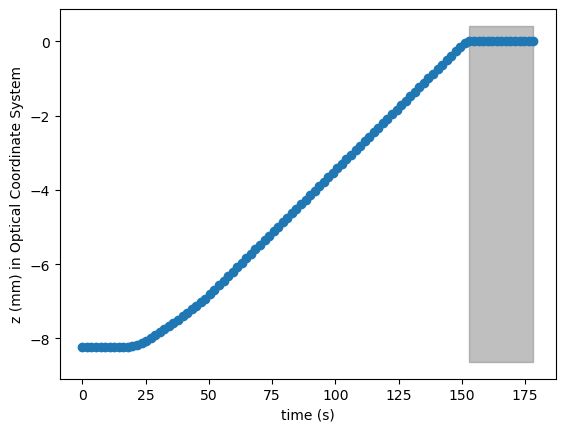

In [4]:
plt.plot(tt-tt[0], mirror_z[:,2]*1e3, '-o');
plt.xlabel('time (s)')
plt.ylabel('z (mm) in Optical Coordinate System');
#plt.gca().invert_yaxis();

ymin, ymax = plt.ylim()
true_indices = np.where(hold_idx == True)[0]
plt.fill_betweenx(y=[ymin, ymax], x1=tt[true_indices[0]]-tt[0], x2=tt[true_indices[-1]]-tt[0], 
                  color='gray', alpha=0.5, label="Fully Raised")

In [5]:
idx12 = np.ix_(hold_idx,np.array(dfSA['LSActType']==5)) #select 10 actuators under quads
print(sa_force[idx12[0], idx12[1],2]) #select z force only.
print(saID[np.array(dfSA['LSActType']==5)])

[[901.9833374  903.62408447 962.26275635 900.91290283 951.75799561
  900.7467041  901.56048584 960.47943115 902.24517822 952.9833374 ]
 [901.21630859 902.87841797 961.52667236 902.32891846 951.18591309
  900.19244385 900.29650879 958.75219727 901.35919189 951.30749512]
 [900.82568359 901.4708252  959.41021729 902.91693115 950.75079346
  900.14715576 899.55267334 958.66644287 900.79742432 950.27313232]
 [899.91894531 900.96392822 957.90484619 901.18798828 950.2166748
  899.72698975 899.24511719 958.56945801 900.59747314 949.28961182]
 [899.39025879 900.11907959 957.58685303 901.3013916  950.61169434
  899.47119141 899.74908447 958.331604   899.99206543 949.67028809]
 [898.58032227 899.51403809 956.68829346 900.45629883 949.68255615
  899.57116699 900.4697876  958.27667236 899.74975586 949.97924805]
 [897.97979736 898.41638184 956.44165039 899.51287842 949.25982666
  899.02056885 904.31707764 957.78369141 899.54876709 949.60192871]
 [898.35479736 898.32751465 957.67419434 898.67248535 94

input forces and output figure both in Optical Coordinate System (OCS)


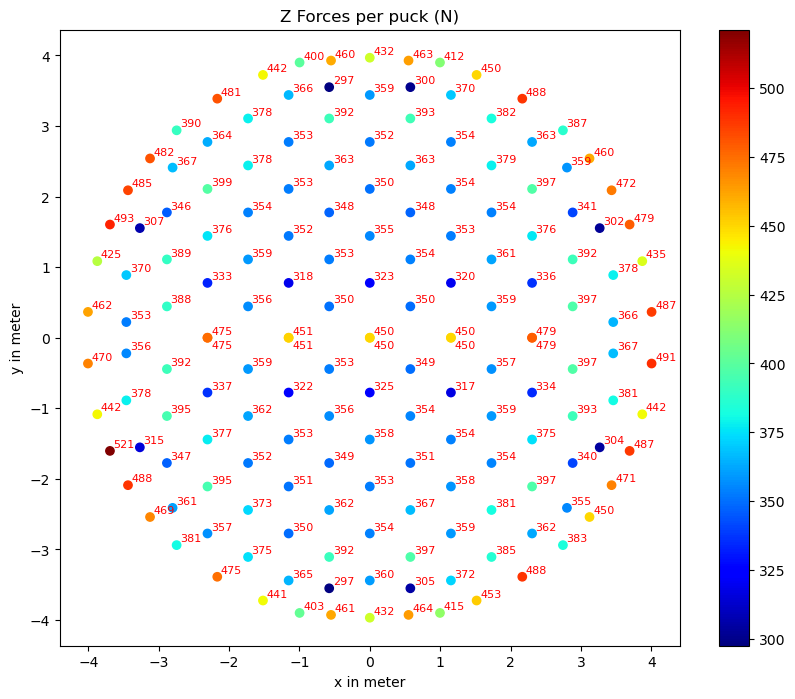

In [6]:
showForceMap(hold_force_per_puck, 'Z Forces per puck (N)')

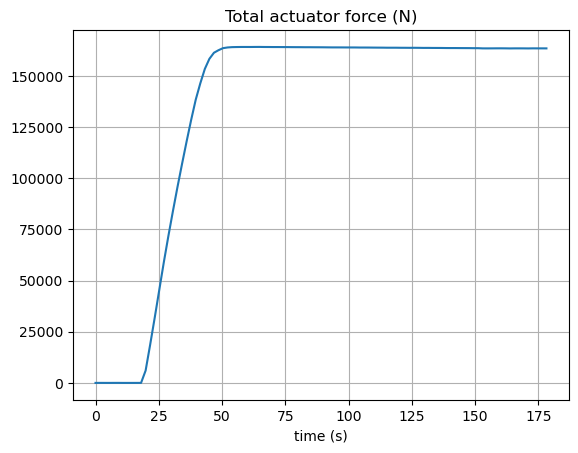

In [7]:
plt.plot(tt-tt[0], sa_force_z_total)
plt.grid()
plt.xlabel('time (s)')
#plt.gca().invert_yaxis();
plt.title('Total actuator force (N)');

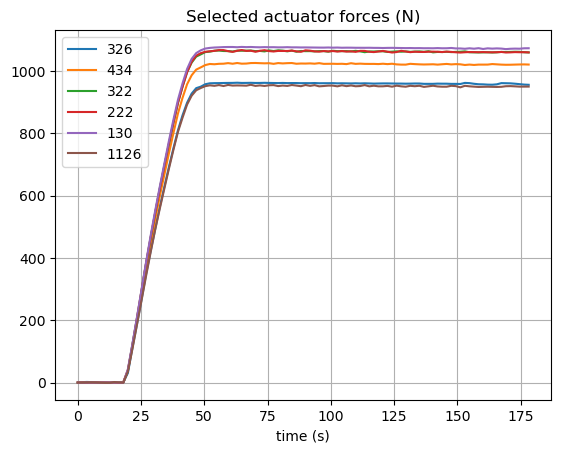

In [8]:
sa_plot = [326, 434, 322, 222, 130, 1126]
for id in sa_plot:
    cc = sa_force[:,saID==id, 2]
    plt.plot(tt-tt[0], cc, label='%d'%id)
plt.grid()
plt.xlabel('time (s)')
plt.legend()
#plt.gca().invert_yaxis();
plt.title('Selected actuator forces (N)');

## Force related variables in the DB (all in the M1B coordinate system)

s/gravity_load: 6, The gravity load forces and moments  
s/ofl_correction: 6, The outer force loop correction forces and moments   
s/total_load: 6, The total load forces and moments  
s/x_bending_mode: 90, The bending mode coefficients for the X axis  
s/y_bending_mode: 90, The bending mode coefficients for the Y axis  
s/z_bending_mode: 170, The bending mode coefficients for the Z axis  
s/mirror_force: 6, The outer (=net) forces of the mirror; calculated from hp_force  
s/mirror_force_disturbance: 6, The outer force disturbances of the mirror  
s/hp_force: 6, The force of the hardpoint  
s/sa_support_force: 170x3, The support force offsets of the support actuators.  
s/sa_bending_force: 170x3, The bending force offsets of the support actuators  
s/sa_unsafe_force: 170x3, The total unverified forces of the support actuators  
s/sa_force: 170x3, The total verified forces of the support actuators  
s/sa_force_moment: 6, The force and moments of the total verified forces of the support actuators.  

sa_force = sa_support_force + sa_bending_force  
sa_support_force = k_matrix(gravity_load + ofl_correction)  
The Fz component of gravity_load is nominal mirror weight  
mirror_foce = hp_matrix(hp_force)  

## Other variables might be of interest
s/mirror_state  
s/mirror_motion_mode  
s/mirror_position: 6  
s/mirror_velocity: 6  
s/hp_control_mode  
s/hp_position: 6  
s/hp_velocity: 6  
s/sa_state: 170  

[158689. 158689. 158689. 158689. 158689. 158689. 158689. 158689. 158689.
 158689. 158689. 158689. 158689. 158689. 158689.]


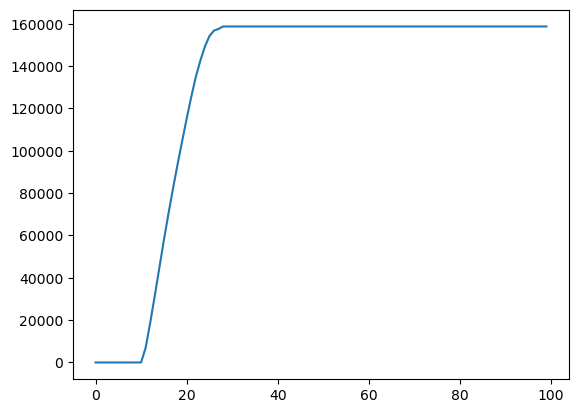

In [9]:
plt.plot(g_load[:,2])
print(g_load[hold_idx, 2])

# sa_force = sa_support_force + sa_bending_force + offset_force

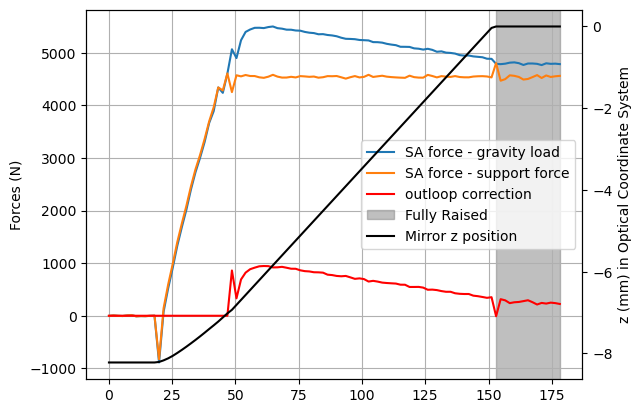

In [10]:
fig, ax1 = plt.subplots()

ax1.plot(tt-tt[0], (sa_force_z_total-g_load[:,2]), label='SA force - gravity load') #visually above y=0 means sa_force is larger than gravity.
ax1.plot(tt-tt[0], (sa_force_z_total-sa_support_force_z_total), label='SA force - support force') 
ax1.plot(tt-tt[0], ofl6[:,2],'r', label='outloop correction')
#ax1.invert_yaxis();

ymin, ymax = ax1.get_ylim()
true_indices = np.where(hold_idx == True)[0]
ax1.fill_betweenx(y=[ymin, ymax], x1=tt[true_indices[0]]-tt[0], x2=tt[true_indices[-1]]-tt[0], 
                  color='gray', alpha=0.5, label="Fully Raised")
ax1.set_ylim([ymin, ymax])
ax1.set_ylabel('Forces (N)')
ax2 = ax1.twinx()

ax2.plot(tt-tt[0], mirror_z[:,2]*1e3, '-k', label='Mirror z position');
ax2.set_xlabel('time (s)')
ax2.set_ylabel('z (mm) in Optical Coordinate System')
#ax2.legend()
#ax2.invert_yaxis();

# Merge legends from both axes
# Get handles and labels for both axes
handles, labels = [], []
handles.extend(ax1.get_legend_handles_labels()[0])
labels.extend(ax1.get_legend_handles_labels()[1])
handles.extend(ax2.get_legend_handles_labels()[0])
labels.extend(ax2.get_legend_handles_labels()[1])

# Create a single legend for both axes
ax1.legend(handles, labels)
ax1.grid();
#ax2.grid();
#ax1.legend()

# what can we check?

### g_load+ofl_correction == sa_support_force? yes

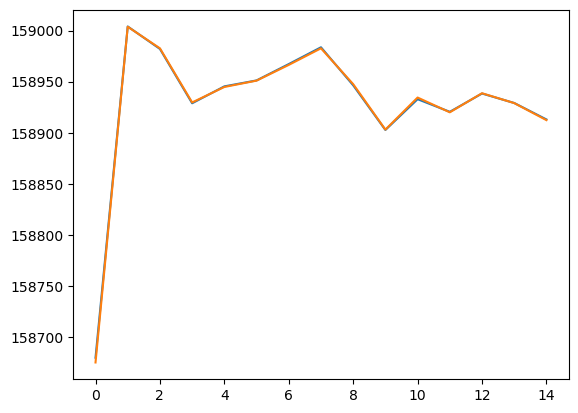

In [11]:
plt.plot(g_load[hold_idx,2]+ofl6[hold_idx,2])
plt.plot(sa_support_force_z_total[hold_idx])

### bending_force  == 0?

In [12]:
bend_force.shape

(15, 170, 3)

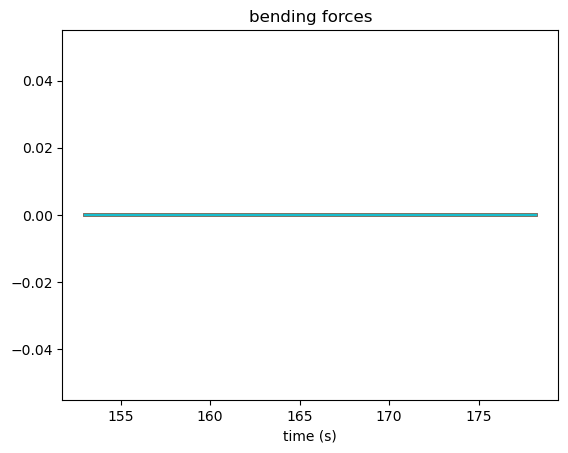

In [13]:
plt.plot(tt[hold_idx]-tt[0], bend_force[:,:,2]);
plt.title('bending forces')
plt.xlabel('time (s)');
#170 lines plotted below

### offset force (from telemetry) = coffee file? yes

https://github.com/CanisUrsa/ocs_m1_dcs/blob/master/src/etc/conf/m1_support_pkg/common/m1_sa_figure_force_offset_conf.coffee

In [15]:
import re
ctrlFolder = '/Users/bxin/gmt_local/modules/ocs_m1_dcs/src/etc/conf/m1_support_pkg/common/'
FB_K_file = 'm1_sa_figure_force_offset_conf.coffee'
filename = os.path.join(ctrlFolder, FB_K_file)

fid = open(filename)
offsets = np.zeros((170, 3))
i = 0
for line in fid:
    if len(line)>20:
        a = re.split('\[|]|,',line)
        a = [x for x in a if (x and not x.isspace() and x!='\n')]
        #print(a)
        offsets[i,:] = a[:3]
        i += 1
#we always visualize the forces in mlcs
offsets = m1b_to_mlcs(offsets)

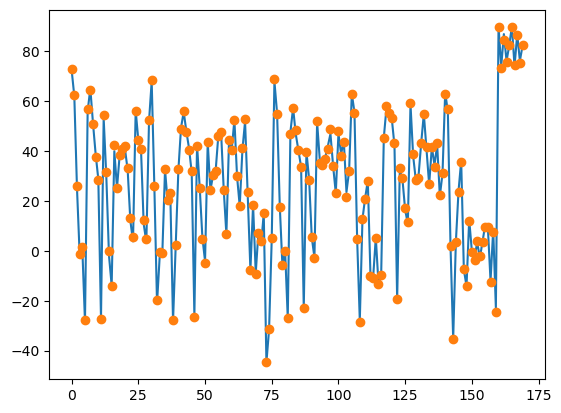

In [17]:
plt.plot(offsets[:,2])
plt.plot(sa_force[-1,:,2] - sa_support_force[-1,:,2], 'o')

### Seperate offset into polishing offset and SA self weights

In [63]:
self_weights = np.ones((170,1))*5 #5N for all singles
self_weights[dfSA['LSActType']>=40] = 46 #46N for triples
self_weights[dfSA['LSActType']==5] = 46
self_weights = np.squeeze(self_weights)

input forces and output figure both in Optical Coordinate System (OCS)


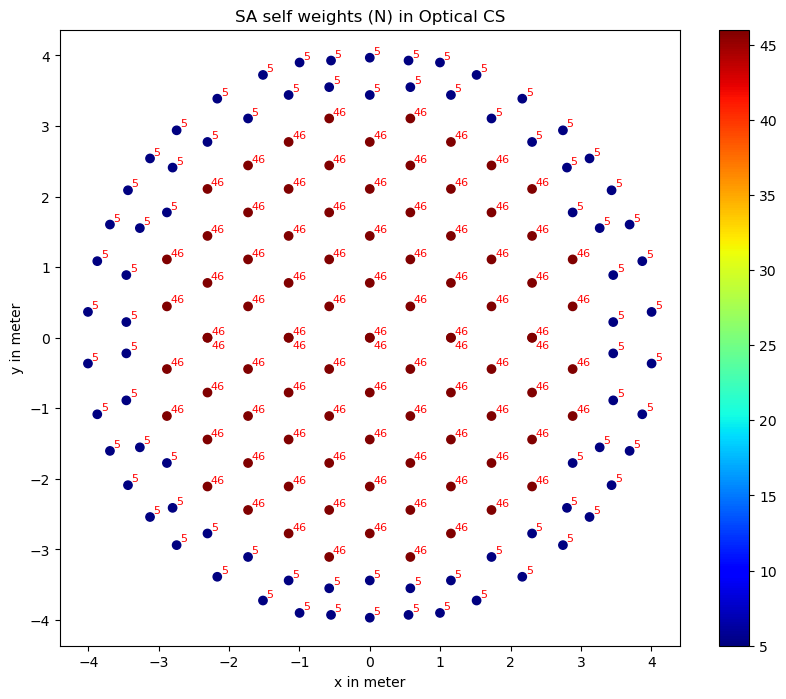

In [64]:
showForceMap(self_weights,'SA self weights (N) in Optical CS')

In [65]:
polishing_offset = offsets[:,2]-self_weights

### Does polishing offset average around zero? yes, that is the purpose

The net force out of the outer loop is the "phantom force". it is only 240 N

input forces and output figure both in Optical Coordinate System (OCS)
-0.026999999999986812
239.3166442532412
4540.0


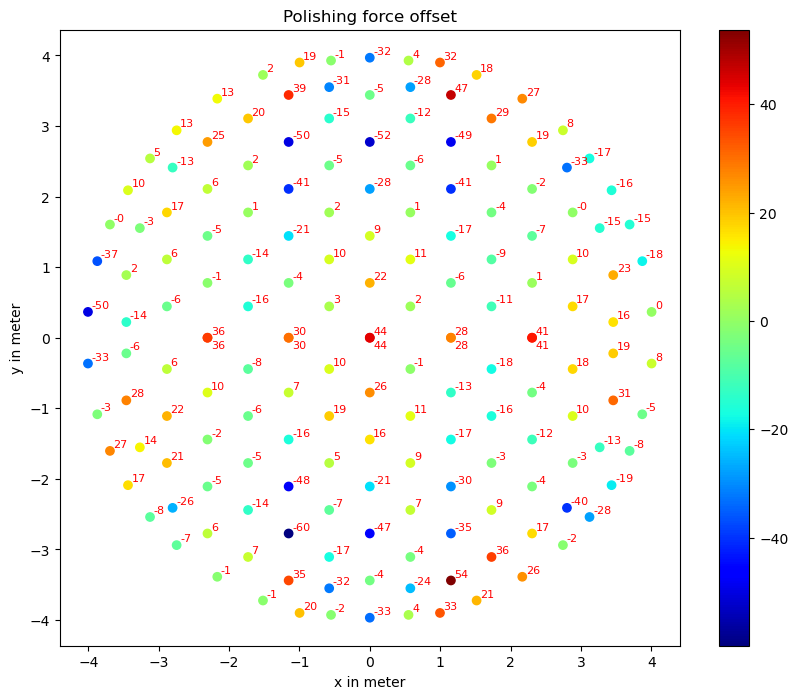

In [82]:
showForceMap(polishing_offset, 'Polishing force offset');
print(np.sum(polishing_offset))
print(np.mean(ofl6[hold_idx,2]))
print(np.sum(self_weights))

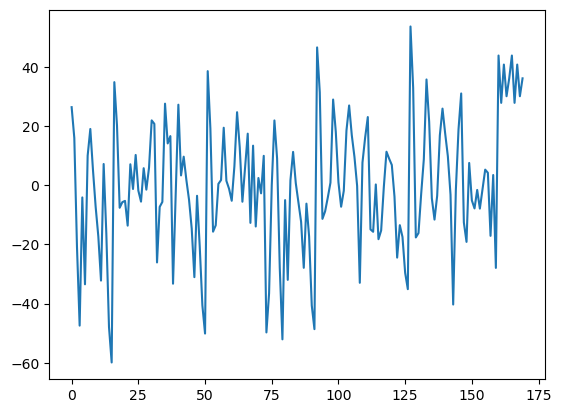

In [68]:
plt.plot(polishing_offset)

### Did we adjust g_load to match Steve West's table, so that polishing_offset is roughly zero? Looks like we did

In [69]:
dataFolder = '../model_data/'
df = pd.read_excel(dataFolder+'gmt3_final_forces_english.xlsx', skiprows=2)
nact_sw = len(df)
print('Number of actuators = ', nact_sw)

sax_sw = np.array(df['y_opt (in)'])*in2mm/1000 #swap x/y to get to M1B (M1DCS uses M1B!!!)
say_sw = np.array(df['x_opt (in)'])*in2mm/1000
f_FEM = np.array(df['f_FEM (lbs)'])*lbs2N
f_active = np.array(df['f_active (lbs)'])*lbs2N
f_quad = np.array(df['newquad_corr (lbs)'])*lbs2N
f_corr = np.array(df['gmto_zfrc (lbs)'])*lbs2N
saID_sw_q = np.array(df['act #']) #steve west assigned these IDs, whether they are same as Trupti's is Questionable

Number of actuators =  170


In [72]:
sw_force = swFvec2gmtFvec(f_corr)

In [73]:
print(sum(sw_force))
print(g_load[-1,2])

158688.67906476549
158689.0


### Anyway,bottom line - are we applying polishing forces?

## YES, but note that we are applying (polishing forces + SA self weights)

input forces and output figure both in Optical Coordinate System (OCS)
251.0141237110381
239.3166442532412


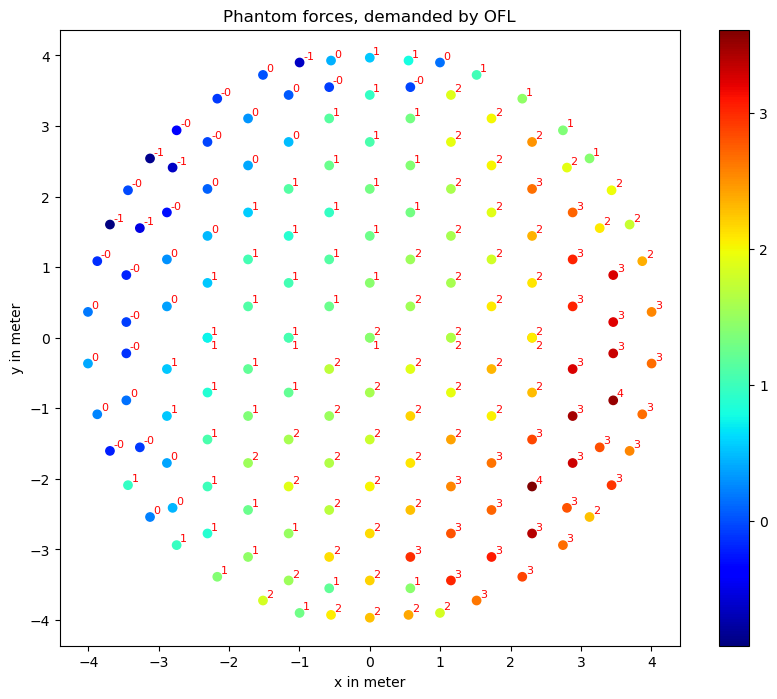

In [85]:
phantom_force = np.mean(sa_force[hold_idx,:,2], axis=0)-sw_force-self_weights
showForceMap(phantom_force,'Phantom forces, demanded by OFL')
print(np.sum(phantom_force))
print(np.mean(ofl6[hold_idx,2]))